CNN approach to classify images. Starting with CIFAR10 w/ 10 classes of things from 50000 train and 10000 test

In [0]:
#import cifar10 dataset https://www.cs.toronto.edu/~kriz/cifar.html this was used for the original concept of this but I adapted it to our dataset.
#create mapping from 0-2 to represent the strings instead of their integers.
num_name = ['healthy',
            'damaged',
            'recovering']


Using TensorFlow backend.


Determine the x_train/test and y_train/test where:


*   x_train is the labeled training data, and test is what you're testing on
*   y_train is the labels mapping to x_train



In [0]:

#x_train is the labeled training dataset of images.
x_train = ...
#y_train should be a one-dimensional list of the labels in the [0,1,2] category for each image corresponding in x_train
y_train = ...
#the testing dataset, unlabeled
x_test = ...
#labels of testing dataset
y_test = ...

170500096/170498071 [==============================] - 2s 0us/step


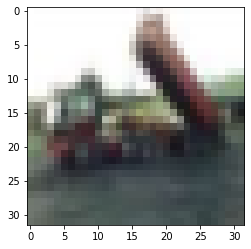

In [0]:
import matplotlib.pyplot as plt
#just show one of the images
img = plt.imshow(x_train[2])

In [0]:
#print that cell's class.
print(num_name[int(y_train[2])])

truck


In [0]:
#check the dimensions of each
print('xtrain', x_train.shape)
print('ytrain', y_train.shape)
print('xtest', x_test.shape)
print('ytest', y_test.shape)


xtrain (50000, 32, 32, 3)
ytrain (50000, 1)
xtest (10000, 32, 32, 3)
ytest (10000, 1)


One Hot encoding to convert the labels into set of 3 values for NN input

In [0]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Print new labels
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Normalize pixel values from 0 to 1 by dividing each pixel value by 255 (max pixel value).

In [0]:
x_train = x_train / 255
x_test = x_test / 255

Build CNN using Sequential architecture


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#create architecture
model = Sequential()

#1st convolution layer to create feature maps
#using ReLU as is most common

model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))

#MaxPooling2d layer to reduce dimensionality by half, for example, going to reduce 32x32 image to 16x16 - Is Maxpooling too far a concern for ours because the pixels are so important we don't want to reduce their dimensionality?
model.add(MaxPooling2D(pool_size=(2, 2)))

#Second convolution layer
model.add(Conv2D(64, (5, 5), activation='relu'))

#Second Maxpooling2d layer, reducing from 32-16-8
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten layer which makes the image into a 1d array for NN input
model.add(Flatten() )


#add neurons, using relu activation fn for first 1000 and softmax for 10
model.add( Dense(1000, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


Compile the model here
As well as set loss function
   * Categorical CrossEntropy = 74% across 10 epochs
   * Hinge is bad.
going to try both and evaluate how it tests.

Set optimizer function, going to use Adam over stochastic gradient descent

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

Time to train/fit the model
Batch size = total # of training examples.
43s for 10 epochs 84% GPU


In [0]:
import time

start = time.time()
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=256, epochs=10, validation_split=0.3 )
print(time.time() - start)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 35000 samples, validate on 15000 samples
Epoch 1/10





35000/35000 [==============================] - 72s 2ms/step - loss: 1.7044 - acc: 0.3835 - val_loss: 1.4197 - val_acc: 0.4957
Epoch 2/10
35000/35000 [==============================] - 72s 2ms/step - loss: 1.3385 - acc: 0.5200 - val_loss: 1.3359 - val_acc: 0.5297
Epoch 3/10
35000/35000 [==============================] - 72s 2ms/step - loss: 1.1751 - acc: 0.5858 - val_loss: 1.1923 - val_acc: 0.5823
Epoch 4/10
35000/35000 [==============================] - 72s 2ms/step - loss: 1.0675 - acc: 0.6257 - val_loss: 1.1173 - val_acc: 0.6095
Epoch 5/10
35000/35000 [==============================] - 73s 2ms/step - loss: 0.9665 - acc: 0.6622 - val_loss: 1.0338 - val_acc: 0.6425
Epoch 6/10
35000/35000 [==============================] - 73s 2ms/step - loss: 0.8774 - acc: 0.6951 - val_loss: 1.0214 - val_acc: 0.6497
Epoch 7/10
35000/35000 [==

Trying my own image to test this classifier.

In [0]:
# #Load the data -- may not work off of colab. irrelevant
# from google.colab import files # Use to load data on Google Colab
# uploaded = files.upload() # Use to load data on Google Colab


Saving bus.jfif to bus (1).jfif


In [0]:
#load your own image here for testing.
my_image = plt.imread(...)

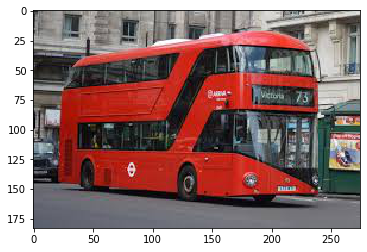

In [0]:
plt.imshow(my_image)

need to rescale images to  32x32

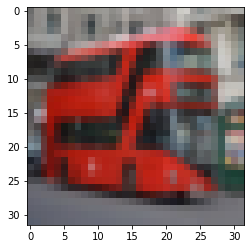

In [0]:
#resizing the image from whatever their dimension was to the 32x32 size.
from skimage.transform import resize
resized = resize(my_image, (32,32,3))
img = plt.imshow(resized)

Get probabilities for each of the 10 classes and store into var

In [0]:
import numpy as np
probabilities = model.predict(np.array([resized]))

In [0]:
probabilities

array([[1.0165861e-03, 2.8284487e-01, 4.0279294e-05, 6.0594856e-04,
        3.1476440e-05, 4.5118757e-04, 1.3947267e-04, 4.1867749e-04,
        1.7855634e-03, 7.1266598e-01]], dtype=float32)

In [0]:
index = np.argsort(probabilities[0,:])

In [0]:
index


array([4, 2, 6, 7, 5, 3, 0, 8, 1, 9])

In [0]:
print("Most likely class:", num_name[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", num_name[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", num_name[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", num_name[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", num_name[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: truck -- Probability: 0.712666
Second most likely class: automobile -- Probability: 0.28284487
Third most likely class: ship -- Probability: 0.0017855634
Fourth most likely class: airplane -- Probability: 0.0010165861
Fifth most likely class: cat -- Probability: 0.00060594856


TODO: Now need to try it on the labeled simple dataset, which has 3 classes. same parameters should work.